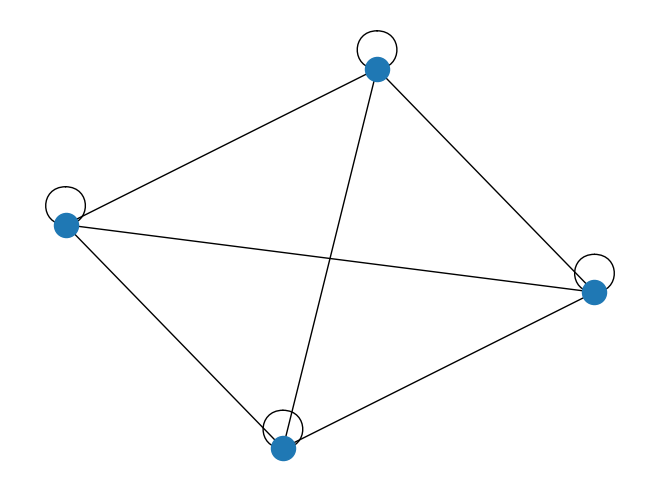

[0, 1, 2, 3]


In [9]:
def create_modular_network(num_subnets, num_nodes_per_subnet, rewiring_prob):

    # Create a list of subnets
    subnets = []
    for i in range(num_subnets):
        subnet = nx.watts_strogatz_graph(num_nodes_per_subnet, 4, rewiring_prob)
        subnets.append(subnet)

    # Create a new graph
    G = nx.Graph()

    # Add all the subnets to the new graph
    for subnet in subnets:
        G.add_nodes_from(subnet.nodes())
        G.add_edges_from(subnet.edges())

    # Add connections between subnets
    for i in range(num_subnets):
        for j in range(i+1, num_subnets):
            node_i = np.random.choice(subnets[i].nodes())
            node_j = np.random.choice(subnets[j].nodes())
            G.add_edge(node_i, node_j)

    return G


G = create_modular_network(100, 4, 0.1)
nx.draw(G)
plt.show()

cliques = list(nx.find_cliques(G))
for clique in cliques:
    print(clique)

# For MRF, we don't necessarily have to do it compositionally.
# Let's just do the whole thing. 
# 1. Create modular network, with 4 subnets, 10 nodes per subnet, rewiring prob 0.1
# 2. For each clique, create a random potential function
# 3. Run LBP. 

# Then we can do sensitivity analysis for the rewiring probability, and see how it affects the convergence of LBP.
# We can also do sensitivity analysis for the number of subnets, and see how it affects the convergence of LBP.
# We can also do sensitivity analysis for the number of nodes per subnet, and see how it affects the convergence of LBP.


ModuleNotFoundError: jax requires jaxlib to be installed. See https://github.com/google/jax#installation for installation instructions.

: 